<a href="https://colab.research.google.com/github/karansingla11223344/Ad-Ease-Business-Case/blob/main/AdEase_time_series_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AdEase time series business case

AdEase is a data-driven advertising platform dedicated to helping businesses maximize ad effectiveness while minimizing costs. To deliver personalized and impactful campaigns, AdEase relies on forecasted traffic patterns across different online channels.

Problem Statement

AdEase currently lacks a reliable method to forecast future page views across various markets. Without accurate predictions, the company faces several risks:

Inefficient Ad Investment: Deploying ads during low-traffic periods leads to wasted resources.

Missed High-Traffic Opportunities: The inability to anticipate viewership peaks can result in lost engagement and conversions.

Resource Planning Challenges: Inadequate forecasting hampers server scaling, content planning, and budget allocation for high-impact periods.


Despite having access to extensive time-series data of daily Wikipedia page views across different languages and access platforms, AdEase hasn’t yet built an integrated pipeline to produce actionable forecasts.


---

Goal

Develop a robust, scalable time-series forecasting system that:

Produces reliable daily predictions of page views for each language.

Supports data-driven campaign strategy, operational planning, and budget optimization.

Enhances AdEase’s ability to act proactively, improving audience reach and ROI.




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown --id 19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE --output Exog_Campaign_eng.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE
To: /content/Exog_Campaign_eng.csv
100% 1.10k/1.10k [00:00<00:00, 4.06MB/s]


In [ ]:

!gdown --id 1qQkymAitU6l2pSe702rDUhQpoP8MUZXl --output train_1.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl
From (redirected): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl&confirm=t&uuid=68c7ae45-6950-4e86-9a43-aaedafa418d9
To: /content/train_1.csv
100% 278M/278M [00:03<00:00, 80.7MB/s]


In [ ]:
df_exg=pd.read_csv('Exog_Campaign_eng.csv')

In [ ]:
df_exg.shape

(550, 1)

In [ ]:
df_exg.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
df = pd.read_csv('train_1.csv')

In [ ]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129608 entries, 0 to 144989
Columns: 555 entries, Page to 2016-12-31
dtypes: float64(550), object(5)
memory usage: 549.8+ MB


In [ ]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,...,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05,1.296080e+05
mean,1.157757e+03,1.164877e+03,1.099803e+03,1.134135e+03,1.179489e+03,1.250772e+03,1.199897e+03,1.159098e+03,1.164249e+03,1.155262e+03,...,1.440042e+03,1.419909e+03,1.444639e+03,1.571690e+03,1.733326e+03,1.731862e+03,1.683122e+03,1.745073e+03,1.518780e+03,1.524877e+03
std,7.125885e+04,7.266807e+04,6.823416e+04,7.110712e+04,7.230345e+04,7.897043e+04,7.422874e+04,6.691909e+04,7.016796e+04,7.077623e+04,...,8.948149e+04,8.075571e+04,8.867861e+04,9.135427e+04,1.021696e+05,9.638501e+04,9.585462e+04,9.407149e+04,8.517048e+04,9.270893e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.200000e+01,1.200000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.000000e+01,1.100000e+01,1.200000e+01,1.300000e+01,1.300000e+01,...,2.400000e+01,2.500000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.500000e+01,2.600000e+01,2.600000e+01,2.500000e+01,2.300000e+01
50%,9.900000e+01,9.800000e+01,9.600000e+01,9.500000e+01,1.020000e+02,1.030000e+02,1.050000e+02,1.070000e+02,1.060000e+02,1.030000e+02,...,1.580000e+02,1.520000e+02,1.410000e+02,1.530000e+02,1.680000e+02,1.720000e+02,1.720000e+02,1.690000e+02,1.640000e+02,1.440000e+02
75%,4.980000e+02,4.930000e+02,4.810000e+02,4.650000e+02,5.140000e+02,5.280000e+02,5.240000e+02,5.300000e+02,5.250000e+02,5.200000e+02,...,6.220000e+02,6.140000e+02,5.880000e+02,6.440000e+02,6.760000e+02,6.840000e+02,6.680000e+02,6.640000e+02,6.480000e+02,5.750000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [ ]:
df.isna().sum(axis=1)

,0
0,0
1,0
2,0
3,0
4,291
...,...
145058,544
145059,550
145060,550
145061,550


In [ ]:
df.isna().sum(axis=0)

,0
Page,0
2015-07-01,20740
2015-07-02,20816
2015-07-03,20544
2015-07-04,20654
...,...
2016-12-27,3701
2016-12-28,3822
2016-12-29,3826
2016-12-30,3635


In [ ]:
df1=df.isna().sum(axis=1)
df1

,0
0,0
1,0
2,0
3,0
4,291
...,...
145058,544
145059,550
145060,550
145061,550


In [ ]:
df1[df1==0]

,0
0,0
1,0
2,0
3,0
5,0
...,...
144944,0
144945,0
144946,0
144947,0


In [ ]:
def parse_page(page):
    try:
        parts = page.rsplit('_', 3)
        if len(parts) == 4:
            page_name = parts[0]
            language = parts[1].split('.')[0]
            access_type = parts[2]
            agent = parts[3]
            return pd.Series([page_name, language, access_type, agent])
        else:
            return pd.Series([None, None, None, None])
    except:
        return pd.Series([None, None, None, None])


In [ ]:

# Apply the function
df[['page_name', 'language', 'access_type', 'agent']] = df['Page'].apply(parse_page)

In [ ]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,page_name,language,access_type,agent
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You,zh,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,12.0,13.0,3.0,5.0,10.0,Underworld_(serie_de_películas),es,all-access,spider
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Resident_Evil:_Capítulo_Final,es,all-access,spider
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Enamorándome_de_Ramón,es,all-access,spider
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Hasta_el_último_hombre,es,all-access,spider


In [ ]:
df['agent'].value_counts()

,count
agent,
all-agents,110150
spider,34913


In [ ]:
df['access_type'].value_counts()

,count
access_type,
all-access,74315
mobile-web,35939
desktop,34809


In [ ]:
df['language'].value_counts()

,count
language,
en,24108
ja,20431
de,18547
fr,17802
zh,17229
ru,15022
es,14069
commons,10555
www,7300


In [ ]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
       '2016-12-31', 'page_name', 'language', 'access_type', 'agent'],
      dtype='object', length=555)

In [ ]:
cols= ['Page','page_name', 'language', 'access_type', 'agent']
date_cols=[col for col in df.columns if col not in cols]
df=df[cols+date_cols]

In [ ]:
df

,Page,page_name,language,access_type,agent,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,2NE1,zh,all-access,spider,18.0,11.0,5.0,13.0,14.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,2PM,zh,all-access,spider,11.0,14.0,15.0,18.0,11.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,3C,zh,all-access,spider,1.0,0.0,1.0,1.0,0.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,4minute,zh,all-access,spider,35.0,13.0,10.0,94.0,4.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,52_Hz_I_Love_You,zh,all-access,spider,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,Underworld_(serie_de_películas),es,all-access,spider,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,Resident_Evil:_Capítulo_Final,es,all-access,spider,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,Enamorándome_de_Ramón,es,all-access,spider,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,Hasta_el_último_hombre,es,all-access,spider,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
threshold = 0.7*df.iloc[:,5:].shape[1]
threshold

385.0

In [ ]:
df=df[df.iloc[:,5:].notna().sum(axis=1)>=threshold]

In [ ]:
df.shape

(129608, 555)

In [ ]:
df['page_name'].value_counts().reset_index()

,page_name,count
0,Special:Search,35
1,Google,30
2,Facebook,28
3,YouTube,28
4,IPhone,24
...,...,...
42904,File:Wiki-sball_hetero.png,1
42905,File:Wikipedia_mobile_en.svg,1
42906,File:Wimshurst_Machine_VGA.webm,1
42907,File:Wolbachia.png,1


In [ ]:
df[df['page_name']=="Google"]

,Page,page_name,language,access_type,agent,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
65,Google_zh.wikipedia.org_all-access_spider,Google,zh,all-access,spider,44.0,31.0,18.0,34.0,56.0,...,55.0,44.0,53.0,67.0,54.0,46.0,54.0,43.0,38.0,54.0
6478,Google_fr.wikipedia.org_desktop_all-agents,Google,fr,desktop,all-agents,1649.0,1670.0,1589.0,1209.0,1259.0,...,1206.0,1226.0,864.0,942.0,1218.0,1264.0,1307.0,1304.0,1438.0,1050.0
11309,Google_en.wikipedia.org_desktop_all-agents,Google,en,desktop,all-agents,25527.0,24921.0,20744.0,17430.0,18822.0,...,13187.0,11365.0,9425.0,8827.0,10807.0,12306.0,13674.0,13249.0,12211.0,9727.0
15237,Google_commons.wikimedia.org_all-access_spider,Google,commons,all-access,spider,11.0,7.0,6.0,11.0,15.0,...,3.0,7.0,6.0,5.0,7.0,7.0,9.0,14.0,8.0,10.0
15909,Google_ru.wikipedia.org_mobile-web_all-agents,Google,ru,mobile-web,all-agents,517.0,554.0,531.0,585.0,568.0,...,546.0,509.0,615.0,652.0,596.0,503.0,590.0,575.0,532.0,473.0
24196,Google_fr.wikipedia.org_all-access_all-agents,Google,fr,all-access,all-agents,2690.0,2671.0,2661.0,2322.0,2601.0,...,2745.0,2709.0,2505.0,2756.0,2822.0,2650.0,2780.0,2796.0,2908.0,2463.0
28027,Google_zh.wikipedia.org_all-access_all-agents,Google,zh,all-access,all-agents,1157.0,1982.0,2058.0,1623.0,1755.0,...,1499.0,1271.0,1493.0,1476.0,1437.0,1534.0,1442.0,1487.0,1430.0,1332.0
35165,Google_en.wikipedia.org_all-access_spider,Google,en,all-access,spider,275.0,309.0,267.0,198.0,238.0,...,958.0,992.0,709.0,715.0,811.0,1041.0,1819.0,965.0,1414.0,514.0
40078,Google_en.wikipedia.org_all-access_all-agents,Google,en,all-access,all-agents,48736.0,47986.0,45212.0,40972.0,42400.0,...,25371.0,23345.0,21782.0,22193.0,24417.0,25103.0,26149.0,26590.0,24872.0,21974.0
45722,Google_commons.wikimedia.org_all-access_all-ag...,Google,commons,all-access,all-agents,101.0,105.0,96.0,93.0,117.0,...,64.0,89.0,64.0,60.0,88.0,65.0,74.0,106.0,69.0,73.0


In [ ]:
df_count=df['page_name'].value_counts().reset_index()
df_count[df_count['count']==4]

,page_name,count
1779,稲葉浩志,4
1780,"Мельниченко,_Андрей_Игоревич",4
1781,Йоланди_Фиссер,4
1782,Яблочный_Спас,4
1783,"Кусто,_Жак-Ив",4
...,...,...
19155,Academy_Award_for_Best_Actor,4
19156,2016_Summer_Olympics_closing_ceremony,4
19157,2016_Summer_Olympics_medal_table,4
19158,2016_Summer_Olympics_opening_ceremony,4


In [ ]:
df_not_nan=df.copy()

# interpolate

In [ ]:
df.iloc[:,5:]=df.iloc[:,5:].interpolate(method='linear',axis=1).ffill(axis=1).bfill(axis=1)

In [ ]:
df

,Page,page_name,language,access_type,agent,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,2NE1,zh,all-access,spider,18.0,11.0,5.0,13.0,14.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,2PM,zh,all-access,spider,11.0,14.0,15.0,18.0,11.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,3C,zh,all-access,spider,1.0,0.0,1.0,1.0,0.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,4minute,zh,all-access,spider,35.0,13.0,10.0,94.0,4.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,5566_zh.wikipedia.org_all-access_spider,5566,zh,all-access,spider,12.0,7.0,4.0,5.0,20.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144983,Sing_(película)_es.wikipedia.org_all-access_sp...,Sing_(película),es,all-access,spider,7.0,7.0,7.0,7.0,7.0,...,41.0,32.0,21.0,43.0,52.0,50.0,120.0,170.0,54.0,49.0
144984,Anónima_(serie_de_televisión)_es.wikipedia.org...,Anónima_(serie_de_televisión),es,all-access,spider,39.0,39.0,39.0,39.0,39.0,...,6.0,3.0,5.0,5.0,3.0,5.0,8.0,0.0,5.0,3.0
144985,Márama_es.wikipedia.org_all-access_spider,Márama,es,all-access,spider,7.0,7.0,7.0,7.0,7.0,...,49.0,36.0,18.0,39.0,30.0,6.0,13.0,35.0,50.0,10.0
144986,Merlí_(serie_de_TV3)_es.wikipedia.org_all-acce...,Merlí_(serie_de_TV3),es,all-access,spider,18.0,18.0,18.0,18.0,18.0,...,14.0,8.0,11.0,10.0,18.0,6.0,18.0,16.0,6.0,10.0


In [ ]:
import pandas as pd

# 1. Keep only all-access
df_allaccess = df[df['access_type'] == 'all-access']

In [ ]:
# 2. Melt date columns into long format
date_cols = df_allaccess.columns[5:]
df_long = df_allaccess.melt(
    id_vars=['Page', 'page_name', 'language', 'access_type', 'agent'],
    value_vars=date_cols,
    var_name='date',
    value_name='views'
)
df_long.head()

,Page,page_name,language,access_type,agent,date,views
0,2NE1_zh.wikipedia.org_all-access_spider,2NE1,zh,all-access,spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2PM,zh,all-access,spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,3C,zh,all-access,spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,4minute,zh,all-access,spider,2015-07-01,35.0
4,5566_zh.wikipedia.org_all-access_spider,5566,zh,all-access,spider,2015-07-01,12.0


In [ ]:
df_long['date'] = pd.to_datetime(df_long['date'])

# 3. Pivot so we have columns for all-agents and spider views
df_pivot = df_long.pivot_table(
    index=['page_name', 'language', 'date'],
    columns='agent',
    values='views',
    fill_value=0
).reset_index()
df_pivot.head()

agent,page_name,language,date,all-agents,spider
0,!vote,en,2015-07-01,3.0,0.0
1,!vote,en,2015-07-02,4.0,0.0
2,!vote,en,2015-07-03,7.0,1.0
3,!vote,en,2015-07-04,4.0,2.0
4,!vote,en,2015-07-05,4.0,0.0


In [ ]:
# 4. Calculate human views
df_pivot['human_views'] = df_pivot['all-agents'] - df_pivot['spider']

# 5. Group by language and date to get daily human views
daily_views = df_pivot.groupby(['date', 'language'])['human_views'].sum().reset_index()








In [ ]:
daily_views.head()

,date,language,human_views
0,2015-07-01,commons,530770.0
1,2015-07-01,de,6679157.0
2,2015-07-01,en,42284429.0
3,2015-07-01,es,7462737.0
4,2015-07-01,fr,4258749.0


In [ ]:
daily_views.drop_duplicates(inplace=True)

In [ ]:
daily_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4950 non-null   datetime64[ns]
 1   language     4950 non-null   object        
 2   human_views  4950 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 116.1+ KB


In [ ]:
daily_views.isna().sum(axis=0)

,0
date,0
language,0
human_views,0


In [ ]:
rows_nan=df.isna().any(axis=1).sum()

In [ ]:
rows_nan

np.int64(0)

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
daily_views.head()

,date,language,human_views
0,2015-07-01,commons,530770.0
1,2015-07-01,de,6679157.0
2,2015-07-01,en,42284429.0
3,2015-07-01,es,7462737.0
4,2015-07-01,fr,4258749.0


In [ ]:
daily_language=daily_views.copy()

In [ ]:
daily_lang_1=daily_language.groupby('language')['human_views'].mean().reset_index()

In [ ]:
daily_lang_1

,language,human_views
0,commons,6.621001e+05
1,de,7.772239e+06
2,en,5.083443e+07
3,es,8.239779e+06
4,fr,5.416006e+06
5,ja,6.961474e+06
6,ru,6.992449e+06
7,www,1.585116e+05
8,zh,2.511709e+06


<Axes: xlabel='language', ylabel='human_views'>

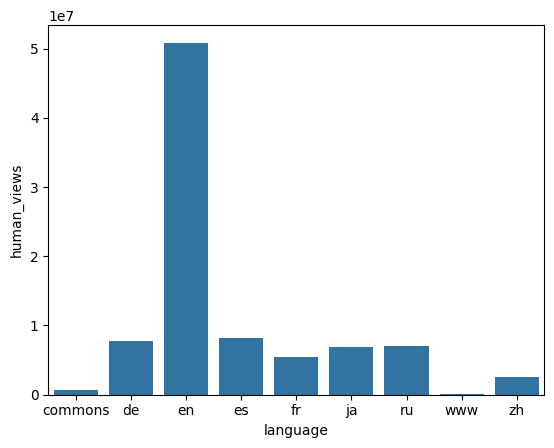

In [ ]:
sns.barplot(x='language',y='human_views',data=daily_lang_1)

Observation

average views on english pages per day is very high as compared to another languages .

spansish and german pages also get descent views except english wiki pages

# language grouped

In [ ]:
df['agent'].value_counts()

,count
agent,
all-agents,98205
spider,31403


In [ ]:
df_lang=daily_views.copy()

In [ ]:
pivoted_lang=daily_views.pivot(index='date',columns='language',values='human_views')
pivoted_lang.index.name='date'

In [ ]:
pivoted_lang.head()

language,commons,de,en,es,fr,ja,ru,www,zh
date,,,,,,,,,
2015-07-01,530770.000000,6.679157e+06,4.228443e+07,7.462737e+06,4.258749e+06,5.870376e+06,4.771721e+06,159010.000000,2.032766e+06
2015-07-02,520621.266667,6.576328e+06,4.220616e+07,7.134966e+06,4.333303e+06,7.179523e+06,4.869321e+06,169425.166667,2.060377e+06
2015-07-03,504489.616667,6.344967e+06,4.014158e+07,6.580452e+06,4.136403e+06,6.159856e+06,4.515623e+06,144929.833333,2.047537e+06
2015-07-04,430563.350000,5.843162e+06,4.194318e+07,6.190843e+06,4.411714e+06,7.684420e+06,4.249558e+06,124180.333333,2.058986e+06
2015-07-05,458579.966667,6.802571e+06,4.336762e+07,6.737412e+06,4.355746e+06,7.392090e+06,4.525352e+06,127796.500000,2.181254e+06


In [ ]:
pivoted_lang.shape

(550, 9)

In [ ]:
df_exgg=df_exg.copy()

In [ ]:
df_exgg['date']=pivoted_lang.index

In [ ]:
df_exgg.head()

,Exog,date
0,0,2015-07-01
1,0,2015-07-02
2,0,2015-07-03
3,0,2015-07-04
4,0,2015-07-05


In [ ]:
df_exgg['date']=pd.to_datetime(df_exgg['date'])

In [ ]:
df_exgg.head()

,Exog,date
0,0,2015-07-01
1,0,2015-07-02
2,0,2015-07-03
3,0,2015-07-04
4,0,2015-07-05


In [ ]:
pivoted_lang=pivoted_lang.reset_index()

In [ ]:
pivoted_lang['date']=pd.to_datetime(pivoted_lang['date'])

In [ ]:
pivoted_lang.head()

language,date,commons,de,en,es,fr,ja,ru,www,zh
0,2015-07-01,530770.000000,6.679157e+06,4.228443e+07,7.462737e+06,4.258749e+06,5.870376e+06,4.771721e+06,159010.000000,2.032766e+06
1,2015-07-02,520621.266667,6.576328e+06,4.220616e+07,7.134966e+06,4.333303e+06,7.179523e+06,4.869321e+06,169425.166667,2.060377e+06
2,2015-07-03,504489.616667,6.344967e+06,4.014158e+07,6.580452e+06,4.136403e+06,6.159856e+06,4.515623e+06,144929.833333,2.047537e+06
3,2015-07-04,430563.350000,5.843162e+06,4.194318e+07,6.190843e+06,4.411714e+06,7.684420e+06,4.249558e+06,124180.333333,2.058986e+06
4,2015-07-05,458579.966667,6.802571e+06,4.336762e+07,6.737412e+06,4.355746e+06,7.392090e+06,4.525352e+06,127796.500000,2.181254e+06


In [ ]:
pivoted_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     550 non-null    datetime64[ns]
 1   commons  550 non-null    float64       
 2   de       550 non-null    float64       
 3   en       550 non-null    float64       
 4   es       550 non-null    float64       
 5   fr       550 non-null    float64       
 6   ja       550 non-null    float64       
 7   ru       550 non-null    float64       
 8   www      550 non-null    float64       
 9   zh       550 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 43.1 KB


In [ ]:

df_exgg=df_exgg.rename(columns={'Exog':'holiday_1'})
pivoted_lang=pivoted_lang.merge(df_exgg,on='date',how='left')
pivoted_lang.head()

,date,commons,de,en,es,fr,ja,ru,www,zh,holiday_1
0,2015-07-01,530770.000000,6.679157e+06,4.228443e+07,7.462737e+06,4.258749e+06,5.870376e+06,4.771721e+06,159010.000000,2.032766e+06,0
1,2015-07-02,520621.266667,6.576328e+06,4.220616e+07,7.134966e+06,4.333303e+06,7.179523e+06,4.869321e+06,169425.166667,2.060377e+06,0
2,2015-07-03,504489.616667,6.344967e+06,4.014158e+07,6.580452e+06,4.136403e+06,6.159856e+06,4.515623e+06,144929.833333,2.047537e+06,0
3,2015-07-04,430563.350000,5.843162e+06,4.194318e+07,6.190843e+06,4.411714e+06,7.684420e+06,4.249558e+06,124180.333333,2.058986e+06,0
4,2015-07-05,458579.966667,6.802571e+06,4.336762e+07,6.737412e+06,4.355746e+06,7.392090e+06,4.525352e+06,127796.500000,2.181254e+06,0


In [ ]:
df_exgg.head()

,holiday_1,date
0,0,2015-07-01
1,0,2015-07-02
2,0,2015-07-03
3,0,2015-07-04
4,0,2015-07-05


In [ ]:
pivoted_lang.set_index('date',inplace=True)

In [ ]:
pivoted_lang.head()

,commons,de,en,es,fr,ja,ru,www,zh,holiday_1
date,,,,,,,,,,
2015-07-01,530770.000000,6.679157e+06,4.228443e+07,7.462737e+06,4.258749e+06,5.870376e+06,4.771721e+06,159010.000000,2.032766e+06,0
2015-07-02,520621.266667,6.576328e+06,4.220616e+07,7.134966e+06,4.333303e+06,7.179523e+06,4.869321e+06,169425.166667,2.060377e+06,0
2015-07-03,504489.616667,6.344967e+06,4.014158e+07,6.580452e+06,4.136403e+06,6.159856e+06,4.515623e+06,144929.833333,2.047537e+06,0
2015-07-04,430563.350000,5.843162e+06,4.194318e+07,6.190843e+06,4.411714e+06,7.684420e+06,4.249558e+06,124180.333333,2.058986e+06,0
2015-07-05,458579.966667,6.802571e+06,4.336762e+07,6.737412e+06,4.355746e+06,7.392090e+06,4.525352e+06,127796.500000,2.181254e+06,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pivoted_lang_cols=pivoted_lang.columns
pivoted_lang_cols

Index(['commons', 'de', 'en', 'es', 'fr', 'ja', 'ru', 'www', 'zh',
       'holiday_1'],
      dtype='object')

In [ ]:
pivoted_lang.index = pd.to_datetime(pivoted_lang.index)
pivoted_lang.loc['2016-07-20':'2016-09-20']

,commons,de,en,es,fr,ja,ru,www,zh,holiday_1
date,,,,,,,,,,
2016-07-20,568875.402174,6.853579e+06,6.532165e+07,6.985078e+06,4622973.0,6689618.0,7.124740e+06,122822.000000,2.526655e+06,1
2016-07-21,584895.579710,6.950058e+06,8.092545e+07,6.906051e+06,4699781.0,6531086.0,9.523610e+06,118010.166667,2.510548e+06,1
2016-07-22,551027.990580,6.875625e+06,8.931922e+07,6.532600e+06,4497462.0,7016757.5,1.265366e+07,136614.666667,2.514350e+06,1
2016-07-23,489578.984783,6.401562e+06,8.847556e+07,5.580187e+06,4448072.0,6571640.5,1.450565e+07,87790.500000,2.445837e+06,1
2016-07-24,495963.002795,7.010120e+06,9.299583e+07,6.218070e+06,4581746.0,8165613.0,1.753711e+07,110137.833333,2.659812e+06,1
...,...,...,...,...,...,...,...,...,...,...
2016-09-16,636337.333333,6.825327e+06,4.777022e+07,7.392654e+06,4773893.5,6189026.0,5.799940e+06,128994.000000,2.855569e+06,0
2016-09-17,592448.000000,6.842797e+06,5.118366e+07,6.690849e+06,5187448.0,6420877.0,5.521218e+06,123754.500000,3.068814e+06,0
2016-09-18,628348.666667,7.470328e+06,5.413901e+07,8.210313e+06,5404223.0,8075565.0,6.456376e+06,159784.000000,3.032379e+06,0


<Axes: xlabel='es', ylabel='Count'>

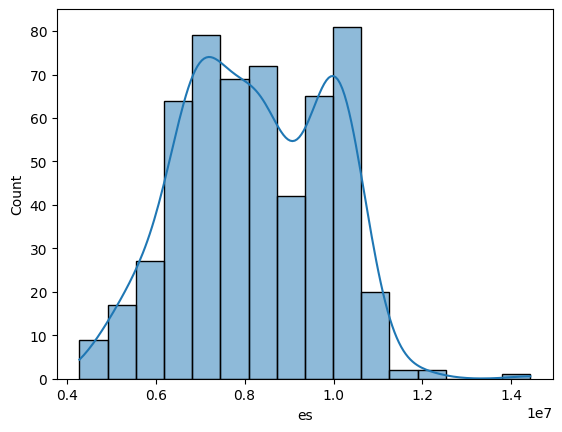

In [ ]:
sns.histplot(data=pivoted_lang,x='es',kde=True)

In [ ]:
for lang in pivoted_lang_cols:
      pivoted_lang[lang]=pivoted_lang[lang].clip(upper=pivoted_lang[lang].quantile(0.98),lower=pivoted_lang[lang].quantile(0.02))

# EN(english)

<Axes: title={'center': 'Daily views for English Pages'}, xlabel='date'>

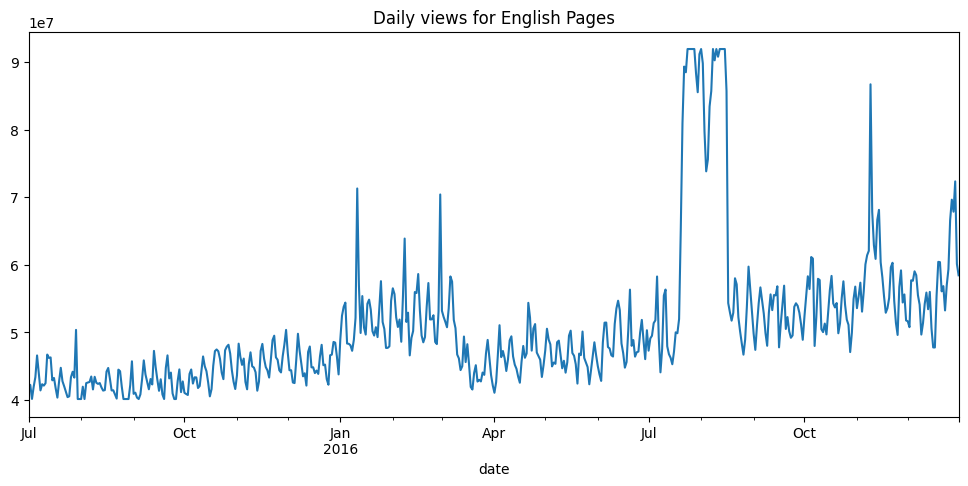

In [ ]:
pivoted_lang.en.plot(kind='line',figsize=(12,5),title='Daily views for English Pages')

In [ ]:

pivoted_lang['en_rolling']=pivoted_lang['en'].rolling(14).mean()

<Axes: xlabel='date'>

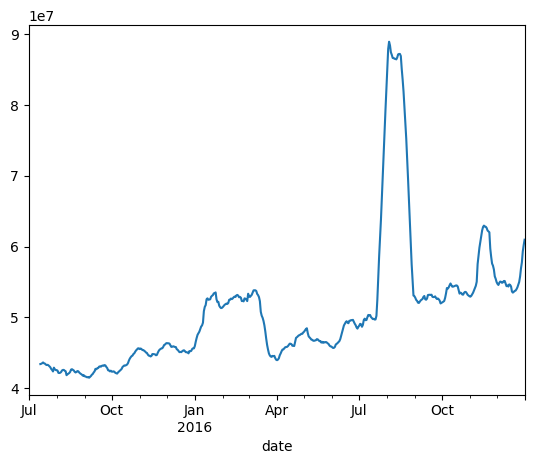

In [ ]:
pivoted_lang.en_rolling.plot(label='14day_moving')

In [ ]:
pivoted_lang['en_rolling_an']=pivoted_lang['en'].rolling(45).mean()

<Axes: xlabel='date'>

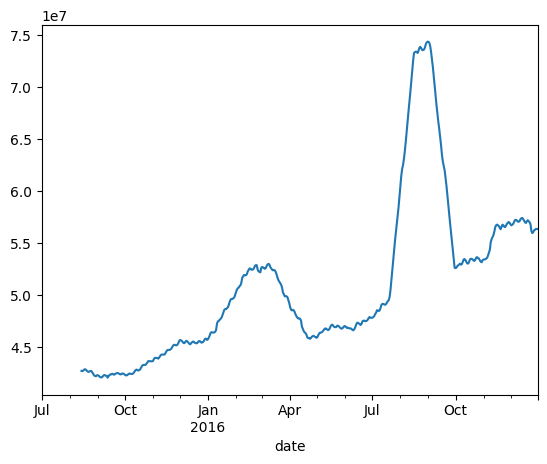

In [ ]:
pivoted_lang.en_rolling_an.plot(label='14day_moving')

observations

with 14 days moving average we can see trend is uptrend with noises present may b due to some events or holidays


with 45 days and 90 days average we can clearly see the uptrend

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

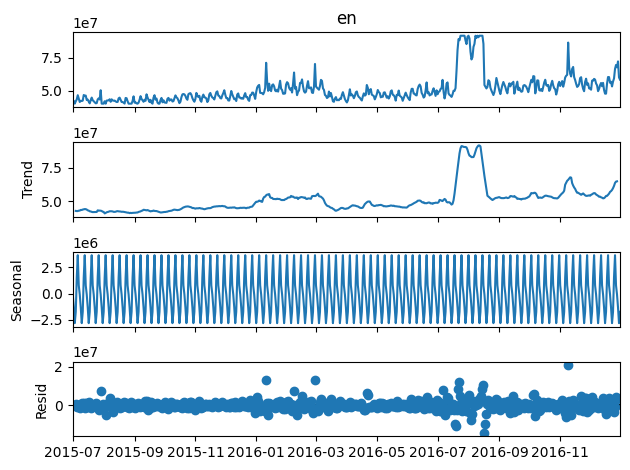

In [ ]:
decomp=seasonal_decompose(pivoted_lang.en,period=7)
decomp.plot();

we choose period=7
from acf and pacf plot

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

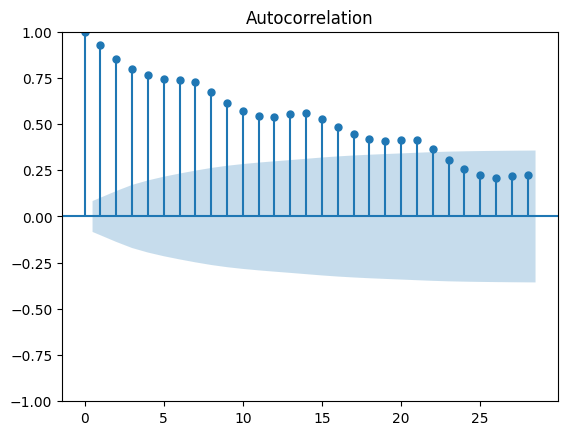

In [ ]:
plot_acf(pivoted_lang.en);

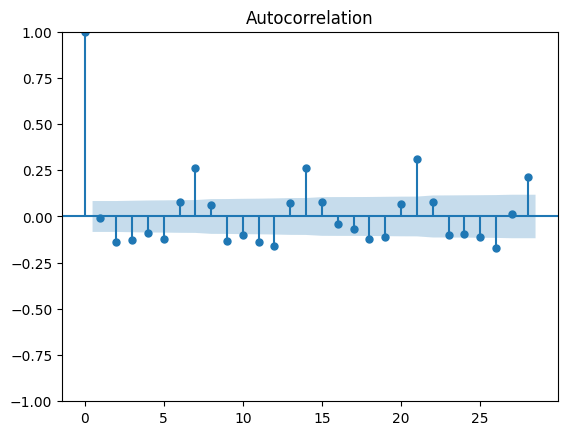

In [ ]:
plot_acf(pivoted_lang.en.diff(1).dropna());

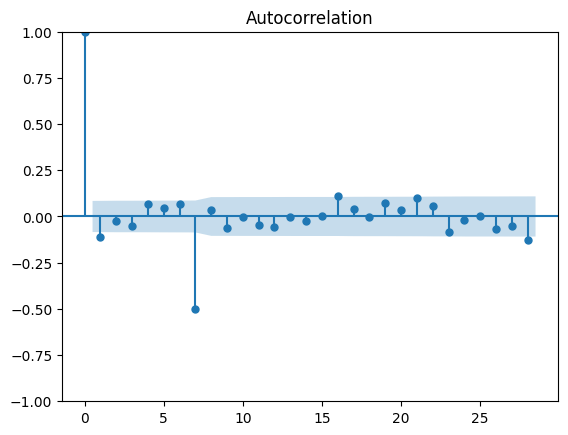

In [ ]:
plot_acf(pivoted_lang.en.diff().diff(7).dropna());

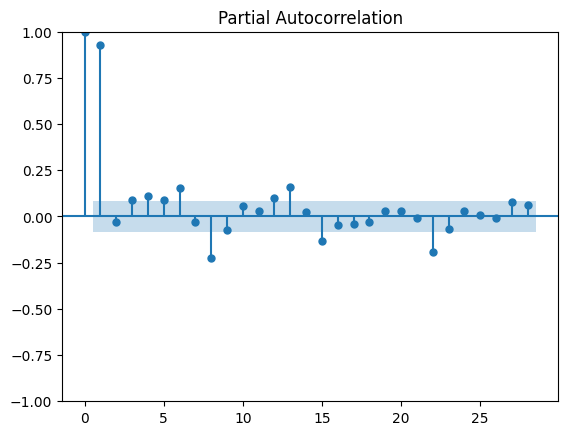

In [ ]:
plot_pacf(pivoted_lang.en);

In [ ]:
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')

In [ ]:
import statsmodels.api as sm
adf_test(pivoted_lang.en)

Sequence is not stationary


<Axes: xlabel='date'>

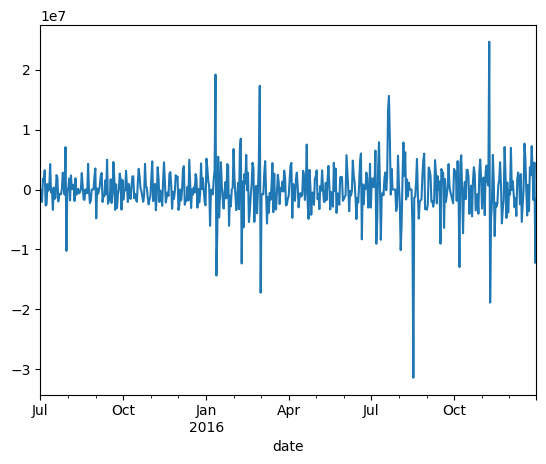

In [ ]:
detrend_en = pivoted_lang.en.diff()
detrend_en.plot()

In [ ]:
adf_test(detrend_en.dropna())

Sequence is stationary


<Axes: xlabel='date'>

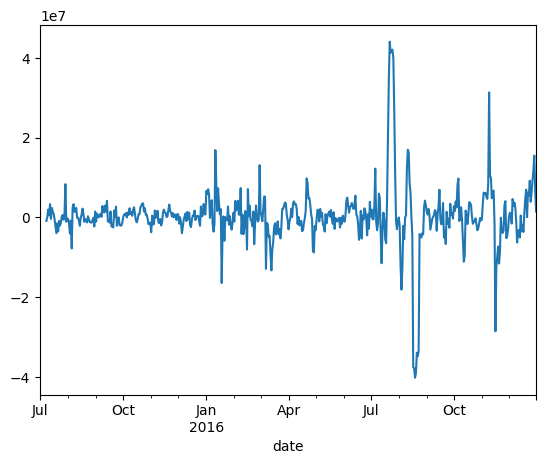

In [ ]:
deseas = pivoted_lang.en.diff(7)
deseas.plot()

<Axes: xlabel='date'>

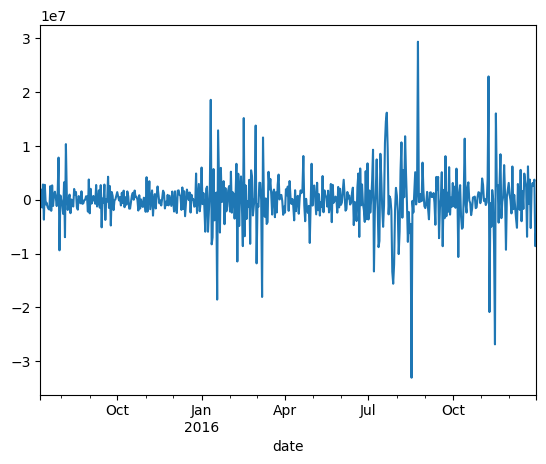

In [ ]:
stationary_en = pivoted_lang.en.diff(1).diff(7).dropna()
stationary_en.plot()

In [ ]:
adf_test(stationary_en)

Sequence is stationary


for arima and sarimax model we need a stationary time series
where no trend and seasonality present

with no trend we achieve stationary time series

In [ ]:
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
pivoted_lang.head()

,commons,de,en,es,fr,ja,ru,www,zh,holiday_1,en_rolling,en_rolling_an
date,,,,,,,,,,,,
2015-07-01,530770.000000,6.679157e+06,4.228443e+07,7.462737e+06,4.258749e+06,5.870376e+06,4.771721e+06,159010.000000,2.032766e+06,0,NaN,NaN
2015-07-02,520621.266667,6.576328e+06,4.220616e+07,7.134966e+06,4.333303e+06,7.179523e+06,4.869321e+06,169425.166667,2.060377e+06,0,NaN,NaN
2015-07-03,504489.616667,6.344967e+06,4.014158e+07,6.580452e+06,4.136403e+06,6.159856e+06,4.515623e+06,144929.833333,2.047537e+06,0,NaN,NaN
2015-07-04,464905.100382,6.197712e+06,4.194318e+07,6.190843e+06,4.411714e+06,7.684420e+06,4.514538e+06,124180.333333,2.058986e+06,0,NaN,NaN
2015-07-05,464905.100382,6.802571e+06,4.336762e+07,6.737412e+06,4.355746e+06,7.392090e+06,4.525352e+06,127796.500000,2.181254e+06,0,NaN,NaN


In [ ]:
train_max_date = pivoted_lang.en.index[-20]
train_en = pivoted_lang.en.loc[pivoted_lang.en.index < pivoted_lang.en.index[-30]].copy()
train_en.name = 'en'
train_en = train_en.asfreq('D')
test_en = pivoted_lang.en.loc[pivoted_lang.en.index >= pivoted_lang.en.index[-30]].copy()

In [ ]:
train_en

,en
date,
2015-07-01,4.228443e+07
2015-07-02,4.220616e+07
2015-07-03,4.014158e+07
2015-07-04,4.194318e+07
2015-07-05,4.336762e+07
...,...
2016-11-27,5.916106e+07
2016-11-28,5.441147e+07
2016-11-29,5.559827e+07


In [ ]:
train_en_st = pd.DataFrame(train_en.copy())
train_en_st.en = train_en_st.en.diff(1)
train_en_st.dropna(inplace=True)
adf_test(train_en_st.en)

Sequence is stationary


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_en = SARIMAX(train_en, order=(3,1,3),seasonal_order=(3,1,3,7))
model_en = model_en.fit(disp=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 5408180.385
RMSE : 7630388.939
MAPE: 0.088


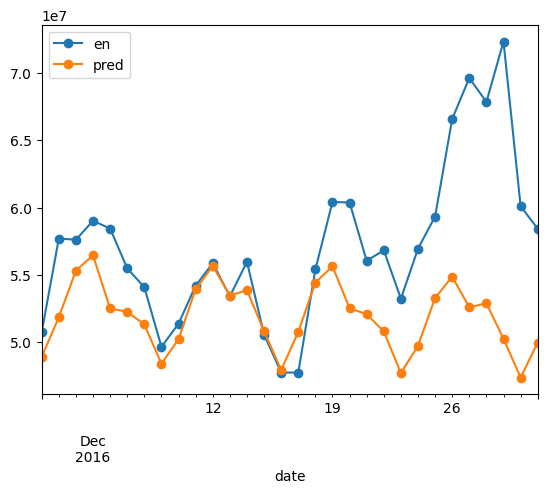

In [ ]:
test_en = pd.DataFrame(test_en.copy())
test_en['en'] = pd.to_numeric(test_en['en'], errors='coerce')
test_en['pred'] = model_en.forecast(steps=30)
test_en.plot(style='-o')
test_en_cleaned = test_en.dropna()
performance(test_en_cleaned['en'], test_en_cleaned['pred'])

order=(3,1,3),seasonal_order=(3,1,3,7)
parameters give the best result

order (p,d,q) Auto regressive(p)=3 , d=1 , Moving Average=3

seasoanl_order (P,D,Q,S)

P-seasonal auto regressive(P)=3
Q=seasonal Moving Average=3
Seasonality=7


SARIMAX

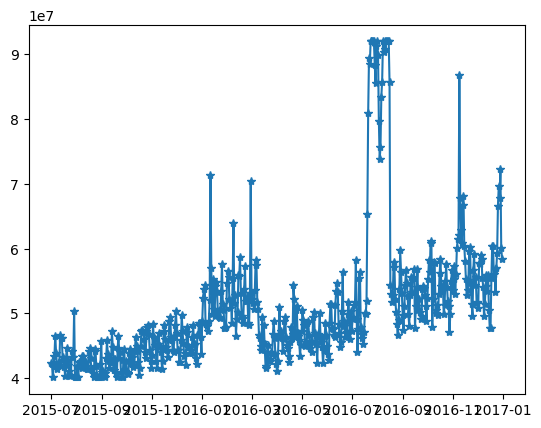

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


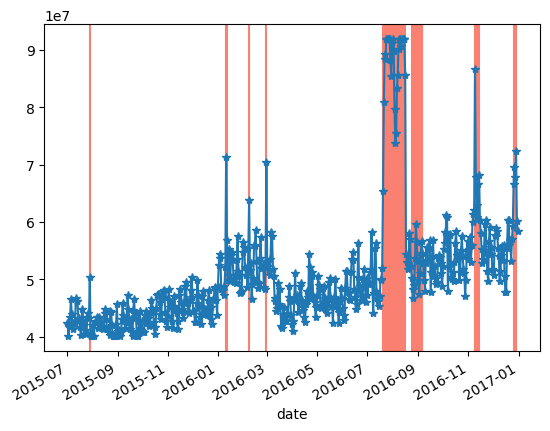

In [ ]:
# Lets take a look at our time series plot
plt.plot(pivoted_lang.index, pivoted_lang['en'], '-*')
plt.show()

# Lets take a look at our time series plot
holidays = pivoted_lang.loc[pivoted_lang.holiday_1==1].index
for hday in holidays:
    plt.axvline(x=hday, color='#FA8072')
pivoted_lang.en.plot(style='-*')
plt.show()



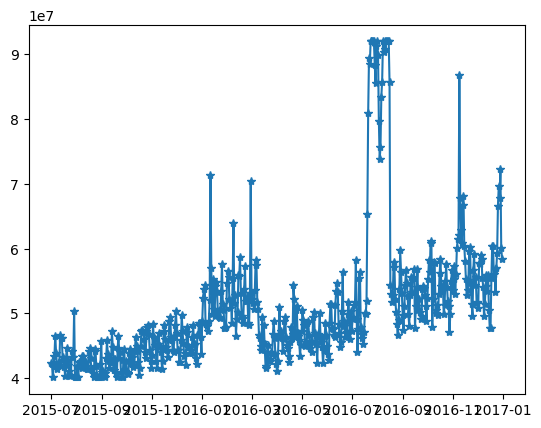

In [ ]:
# Lets take a look at our time series plot
plt.plot(pivoted_lang.index, pivoted_lang['en'], '-*')
plt.show()



/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


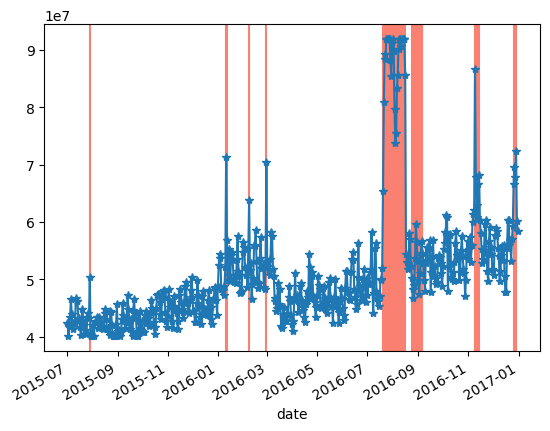

In [ ]:
# Lets take a look at our time series plot
holidays = pivoted_lang.loc[pivoted_lang.holiday_1==1].index
for hday in holidays:
    plt.axvline(x=hday, color='#FA8072')
pivoted_lang.en.plot(style='-*')
plt.show()

In [ ]:
train_en_1 = pivoted_lang[['en','holiday_1']].iloc[:436]
test_en_1 = pivoted_lang[['en','holiday_1']].iloc[436:]

In [ ]:
model = SARIMAX(train_en_1['en'],exog=train_en_1['holiday_1'],order=(3,1,3),seasonal_order=(3,1,3,7),enforce_invertibility=False)
results = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Obtain predicted values
start=len(train_en_1)
end=len(train_en_1)+len(test_en_1)-1

In [ ]:
exog_forecast = test_en_1[['holiday_1']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

MAE : 2706395.802
RMSE : 3816356.708
MAPE: 0.047


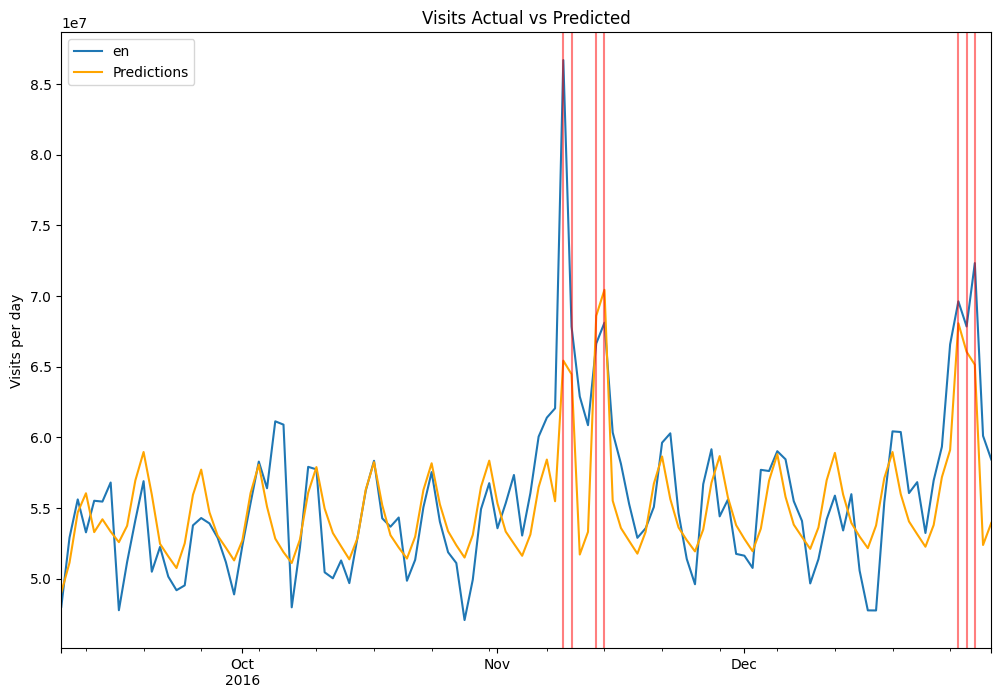

In [ ]:
performance(test_en_1['en'], predictions)
# Plot predictions against known values
title='Visits Actual vs Predicted'
ylabel='Visits per day'
xlabel=''

ax = test_en_1['en'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True, color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test_en_1.query('holiday_1==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5);

Observation

by consider the exogenous variable(holiday) in a model we get better forecasting than without it.

in line plot we see visits of users on english wikipedia pages is very high than their recency

facebook_en

In [ ]:
pivoted_lang_reset=pivoted_lang.reset_index()

In [ ]:
pivoted_lang_en_prophet=pivoted_lang_reset[['date','en']].rename(columns={'date':'ds','en':'y'})
pivoted_lang_en_prophet

,ds,y
0,2015-07-01,4.228443e+07
1,2015-07-02,4.220616e+07
2,2015-07-03,4.014158e+07
3,2015-07-04,4.194318e+07
4,2015-07-05,4.336762e+07
...,...,...
545,2016-12-27,6.962582e+07
546,2016-12-28,6.784617e+07
547,2016-12-29,7.233125e+07
548,2016-12-30,6.010643e+07


In [ ]:
df_exg.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
df_exg['date']=pivoted_lang.index
df_exg=df_exg.rename(columns={'date':'ds','Exog':'holiday'})
df_merged_en=pivoted_lang_en_prophet.merge(df_exg,on='ds',how='left')
df_merged_en.head()

,ds,y,holiday
0,2015-07-01,4.228443e+07,0
1,2015-07-02,4.220616e+07,0
2,2015-07-03,4.014158e+07,0
3,2015-07-04,4.194318e+07,0
4,2015-07-05,4.336762e+07,0


In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(df_merged_en[['ds', 'y']][:-39])
future_en = m.make_future_dataframe(periods=39,freq="D")
forecast_en = m.predict(future_en)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/qi7duhj2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/8047n19j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20518', 'data', 'file=/tmp/tmpjfrfzz9_/qi7duhj2.json', 'init=/tmp/tmpjfrfzz9_/8047n19j.json', 'output', 'file=/tmp/tmpjfrfzz9_/prophet_modelx_v982q6/prophet_model-20250814131811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:18:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_en

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,4.164235e+07,3.135041e+07,5.202242e+07,4.164235e+07,4.164235e+07,-1.302697e+05,-1.302697e+05,-1.302697e+05,-1.302697e+05,-1.302697e+05,-1.302697e+05,0.0,0.0,0.0,4.151208e+07
1,2015-07-02,4.167081e+07,3.046199e+07,5.134945e+07,4.167081e+07,4.167081e+07,-1.264546e+06,-1.264546e+06,-1.264546e+06,-1.264546e+06,-1.264546e+06,-1.264546e+06,0.0,0.0,0.0,4.040627e+07
2,2015-07-03,4.169928e+07,2.824155e+07,4.954227e+07,4.169928e+07,4.169928e+07,-2.676251e+06,-2.676251e+06,-2.676251e+06,-2.676251e+06,-2.676251e+06,-2.676251e+06,0.0,0.0,0.0,3.902303e+07
3,2015-07-04,4.172775e+07,2.991603e+07,4.943205e+07,4.172775e+07,4.172775e+07,-1.773014e+06,-1.773014e+06,-1.773014e+06,-1.773014e+06,-1.773014e+06,-1.773014e+06,0.0,0.0,0.0,3.995473e+07
4,2015-07-05,4.175621e+07,3.333434e+07,5.438818e+07,4.175621e+07,4.175621e+07,1.547343e+06,1.547343e+06,1.547343e+06,1.547343e+06,1.547343e+06,1.547343e+06,0.0,0.0,0.0,4.330356e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2016-12-27,5.511533e+07,4.494821e+07,6.666437e+07,5.476891e+07,5.545357e+07,6.116322e+05,6.116322e+05,6.116322e+05,6.116322e+05,6.116322e+05,6.116322e+05,0.0,0.0,0.0,5.572696e+07
546,2016-12-28,5.507912e+07,4.418357e+07,6.535266e+07,5.471371e+07,5.543648e+07,-1.302697e+05,-1.302697e+05,-1.302697e+05,-1.302697e+05,-1.302697e+05,-1.302697e+05,0.0,0.0,0.0,5.494885e+07
547,2016-12-29,5.504291e+07,4.287699e+07,6.372090e+07,5.466340e+07,5.541654e+07,-1.264546e+06,-1.264546e+06,-1.264546e+06,-1.264546e+06,-1.264546e+06,-1.264546e+06,0.0,0.0,0.0,5.377836e+07
548,2016-12-30,5.500669e+07,4.130233e+07,6.335882e+07,5.461455e+07,5.539152e+07,-2.676251e+06,-2.676251e+06,-2.676251e+06,-2.676251e+06,-2.676251e+06,-2.676251e+06,0.0,0.0,0.0,5.233044e+07


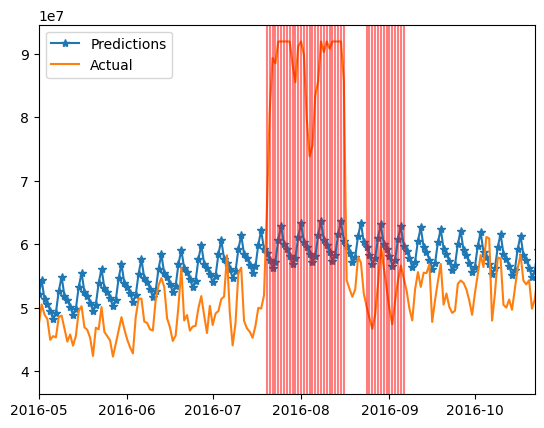

In [ ]:
plt.plot(forecast_en['ds'], forecast_en['yhat'],'-*', label = 'Predictions')
plt.plot(df_merged_en['ds'], df_merged_en['y'], label = 'Actual')
for x in df_merged_en.query('holiday==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2016-05-01'), pd.to_datetime('2016-10-22'))
plt.legend()

In [ ]:
performance(df_merged_en['y'][:-39],forecast_en['yhat'][:-39])

MAE : 5082157.147
RMSE : 8188101.665
MAPE: 0.089


In [ ]:
model2_en=Prophet( yearly_seasonality=True, weekly_seasonality=True,)
model2_en.add_regressor('holiday')
model2_en.fit(df_merged_en[:-39])
forecast2_en = model2_en.predict(df_merged_en)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/ye7r84cu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/mvxzu3y4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51045', 'data', 'file=/tmp/tmpjfrfzz9_/ye7r84cu.json', 'init=/tmp/tmpjfrfzz9_/mvxzu3y4.json', 'output', 'file=/tmp/tmpjfrfzz9_/prophet_modelvz8bdksb/prophet_model-20250814131812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:18:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
performance(df_merged_en['y'][:-39],forecast2_en['yhat'][:-39])

MAE : 3165112.562
RMSE : 4687177.696
MAPE: 0.061


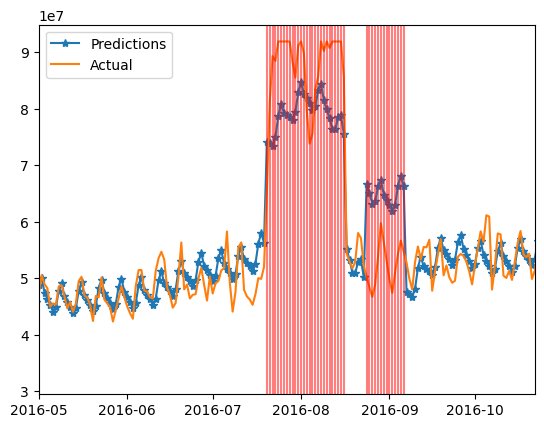

In [ ]:
plt.plot(forecast2_en['ds'], forecast2_en['yhat'],'-*', label = 'Predictions')
plt.plot(df_merged_en['ds'], df_merged_en['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2016-05-01'), pd.to_datetime('2016-10-22'))
for x in df_merged_en.query('holiday==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.legend()

observations

with addition of weekly seasonality and yearly seasonality we get the forecast near to the target

In [ ]:
model2_en=Prophet( yearly_seasonality=True, weekly_seasonality=True,changepoint_prior_scale=4,interval_width=0.95,)
model2_en.add_regressor('holiday')
model2_en.fit(df_merged_en[:-39])
forecast2_en = model2_en.predict(df_merged_en)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/vc6zq01o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/39diid5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12270', 'data', 'file=/tmp/tmpjfrfzz9_/vc6zq01o.json', 'init=/tmp/tmpjfrfzz9_/39diid5q.json', 'output', 'file=/tmp/tmpjfrfzz9_/prophet_model0pak969g/prophet_model-20250814131813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:18:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:18:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


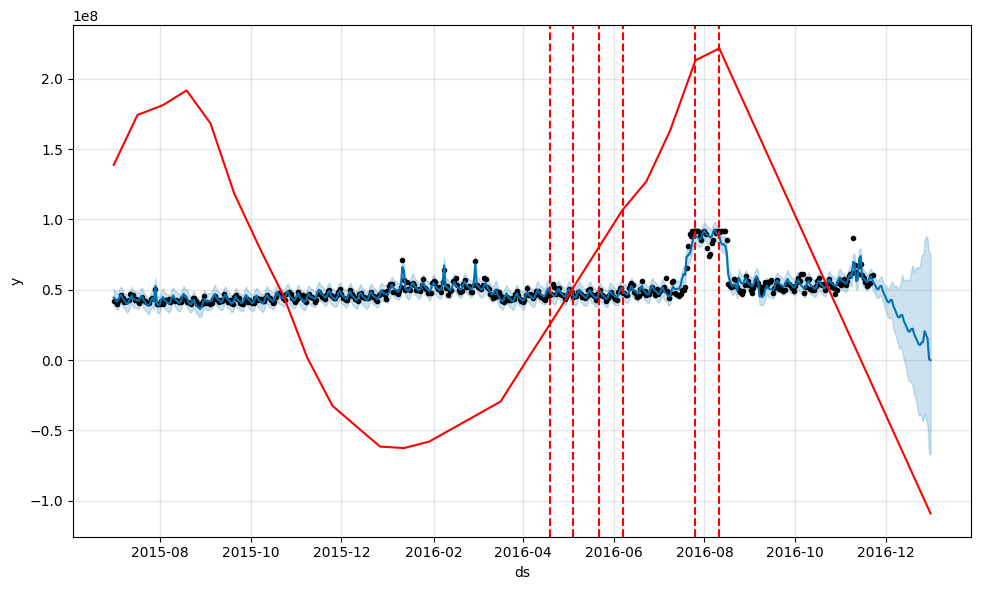

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast2_en)
a = add_changepoints_to_plot(fig.gca(), m, forecast2_en)

MAE : 407603.403
RMSE : 536516.379
MAPE: 0.06


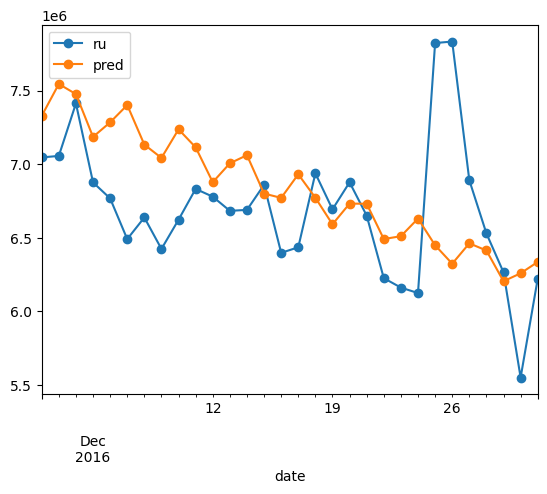

In [ ]:

test_ru = pd.DataFrame(test_ru.copy())
test_ru['ru'] = pd.to_numeric(test_ru['ru'], errors='coerce')
test_ru['pred'] = model_ru.forecast(steps=30)
test_ru.plot(style='-o')
test_ru_cleaned = test_ru.dropna()
performance(test_ru_cleaned['ru'], test_ru_cleaned['pred'])


facebook ru

In [ ]:
pivoted_lang_ru_prophet=pivoted_lang_reset[['date','ru']].rename(columns={'date':'ds','ru':'y'})
pivoted_lang_ru_prophet

,ds,y
0,2015-07-01,4.771721e+06
1,2015-07-02,4.869321e+06
2,2015-07-03,4.515623e+06
3,2015-07-04,4.514538e+06
4,2015-07-05,4.525352e+06
...,...,...
545,2016-12-27,6.891150e+06
546,2016-12-28,6.529655e+06
547,2016-12-29,6.265190e+06
548,2016-12-30,5.550411e+06


In [ ]:

df_merged_ru=pivoted_lang_ru_prophet.merge(df_exg,on='ds',how='left')
df_merged_ru.head()

,ds,y,holiday
0,2015-07-01,4.771721e+06,0
1,2015-07-02,4.869321e+06,0
2,2015-07-03,4.515623e+06,0
3,2015-07-04,4.514538e+06,0
4,2015-07-05,4.525352e+06,0


In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(df_merged_ru[['ds', 'y']][:-39])
future_ru = m.make_future_dataframe(periods=39,freq="D")
forecast_ru = m.predict(future_ru)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/grnytc27.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/erncj5dt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32247', 'data', 'file=/tmp/tmpjfrfzz9_/grnytc27.json', 'init=/tmp/tmpjfrfzz9_/erncj5dt.json', 'output', 'file=/tmp/tmpjfrfzz9_/prophet_modelhmo6t60n/prophet_model-20250814131902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:19:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:19:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_ru

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,5.530655e+06,2.131852e+06,8.706178e+06,5.530655e+06,5.530655e+06,-39797.075756,-39797.075756,-39797.075756,-39797.075756,-39797.075756,-39797.075756,0.0,0.0,0.0,5.490858e+06
1,2015-07-02,5.537140e+06,2.201214e+06,8.972012e+06,5.537140e+06,5.537140e+06,-55148.167402,-55148.167402,-55148.167402,-55148.167402,-55148.167402,-55148.167402,0.0,0.0,0.0,5.481992e+06
2,2015-07-03,5.543626e+06,2.162529e+06,8.676624e+06,5.543626e+06,5.543626e+06,-232562.585511,-232562.585511,-232562.585511,-232562.585511,-232562.585511,-232562.585511,0.0,0.0,0.0,5.311063e+06
3,2015-07-04,5.550111e+06,2.171097e+06,8.785240e+06,5.550111e+06,5.550111e+06,-271664.940003,-271664.940003,-271664.940003,-271664.940003,-271664.940003,-271664.940003,0.0,0.0,0.0,5.278446e+06
4,2015-07-05,5.556597e+06,2.701147e+06,9.231213e+06,5.556597e+06,5.556597e+06,248093.868813,248093.868813,248093.868813,248093.868813,248093.868813,248093.868813,0.0,0.0,0.0,5.804691e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2016-12-27,6.733450e+06,3.534923e+06,1.005169e+07,6.710645e+06,6.757989e+06,123683.737856,123683.737856,123683.737856,123683.737856,123683.737856,123683.737856,0.0,0.0,0.0,6.857134e+06
546,2016-12-28,6.723970e+06,3.383831e+06,1.006257e+07,6.700252e+06,6.750128e+06,-39797.075757,-39797.075757,-39797.075757,-39797.075757,-39797.075757,-39797.075757,0.0,0.0,0.0,6.684173e+06
547,2016-12-29,6.714491e+06,3.408830e+06,1.005171e+07,6.689256e+06,6.741368e+06,-55148.167403,-55148.167403,-55148.167403,-55148.167403,-55148.167403,-55148.167403,0.0,0.0,0.0,6.659342e+06
548,2016-12-30,6.705011e+06,3.148691e+06,1.010925e+07,6.678075e+06,6.733188e+06,-232562.585510,-232562.585510,-232562.585510,-232562.585510,-232562.585510,-232562.585510,0.0,0.0,0.0,6.472448e+06


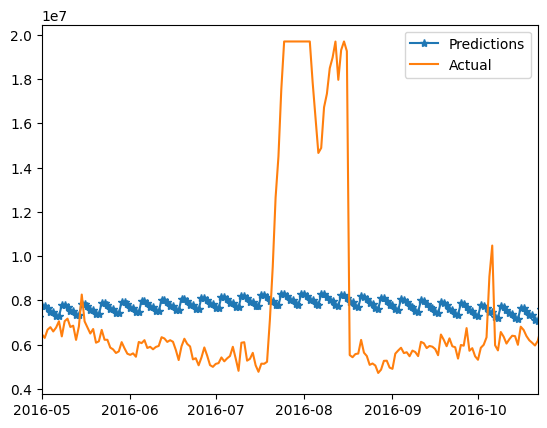

In [ ]:
plt.plot(forecast_ru['ds'], forecast_ru['yhat'],'-*', label = 'Predictions')
plt.plot(df_merged_ru['ds'], df_merged_ru['y'], label = 'Actual')

plt.xlim(pd.to_datetime('2016-05-01'), pd.to_datetime('2016-10-22'))
plt.legend()

In [ ]:
performance(df_merged_ru['y'][:-39],forecast_ru['yhat'][:-39])

MAE : 1392342.308
RMSE : 2614176.592
MAPE: 0.175


In [ ]:
model2_ru=Prophet( yearly_seasonality=True, weekly_seasonality=True,)

model2_ru.fit(df_merged_ru[:-39])
forecast2_ru = model2_ru.predict(df_merged_ru)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/fixbwiy2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/9i0779fa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5736', 'data', 'file=/tmp/tmpjfrfzz9_/fixbwiy2.json', 'init=/tmp/tmpjfrfzz9_/9i0779fa.json', 'output', 'file=/tmp/tmpjfrfzz9_/prophet_model_z2b3wla/prophet_model-20250814131902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:19:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:19:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
performance(df_merged_ru['y'][:-39],forecast2_ru['yhat'][:-39])

MAE : 1176445.243
RMSE : 1913910.345
MAPE: 0.175


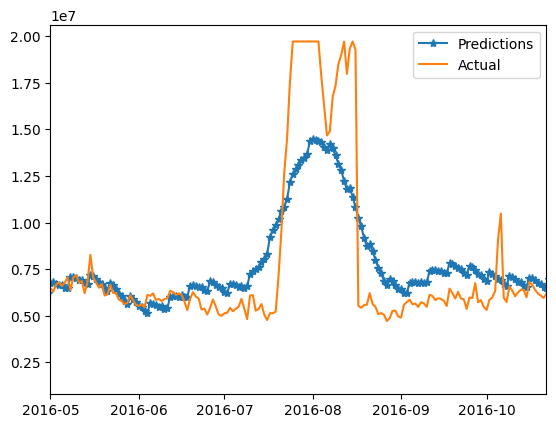

In [ ]:
plt.plot(forecast2_ru['ds'], forecast2_ru['yhat'],'-*', label = 'Predictions')
plt.plot(df_merged_ru['ds'], df_merged_ru['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2016-05-01'), pd.to_datetime('2016-10-22'))

plt.legend()


In [ ]:

model2_ru=Prophet( yearly_seasonality=True, weekly_seasonality=True,changepoint_prior_scale=4,interval_width=0.95,)

model2_ru.fit(df_merged_ru[:-39])
forecast2_ru = model2_ru.predict(df_merged_ru)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/5fe5n6jp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfrfzz9_/q0q11r8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8057', 'data', 'file=/tmp/tmpjfrfzz9_/5fe5n6jp.json', 'init=/tmp/tmpjfrfzz9_/q0q11r8b.json', 'output', 'file=/tmp/tmpjfrfzz9_/prophet_modelbygpbqym/prophet_model-20250814131903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:19:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:19:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


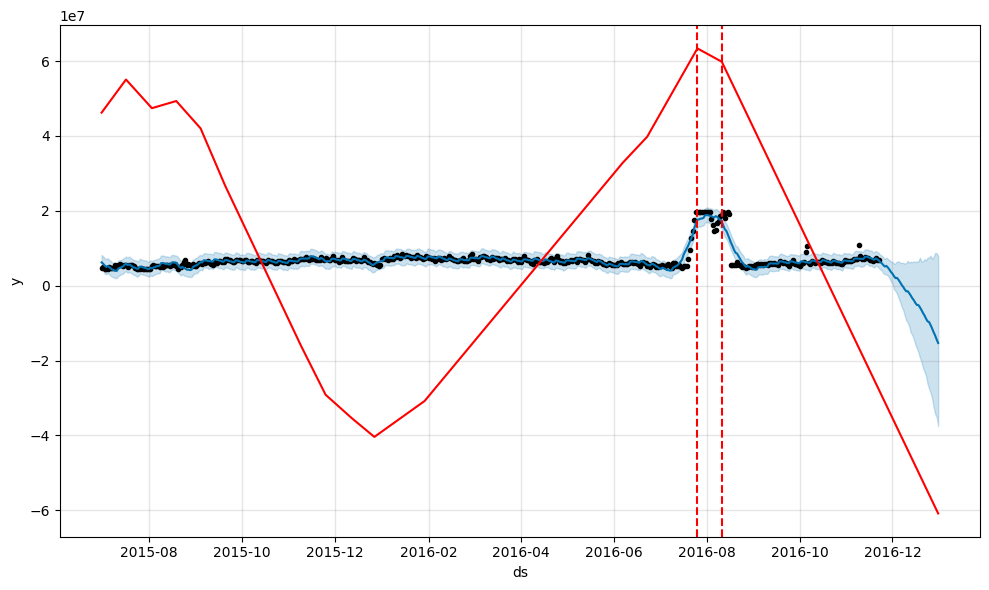

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast2_ru)
a = add_changepoints_to_plot(fig.gca(), m, forecast2_ru)